In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")

%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                ^GSPC       ^IXIC
Date                             
2021-01-04 -55.420166 -189.830078
2021-01-05  26.210205  120.509766
2021-01-06  21.279785  -78.169922
2021-01-07  55.650146  326.690430
2021-01-08  20.889893  134.500000
...               ...         ...
2022-04-13  49.139648  272.019531
2022-04-14 -54.000000 -292.509766
2022-04-18  -0.899902  -18.719727
2022-04-19  70.520020  287.299805
2022-04-20  14.620117 -106.339844

[327 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


Najpierw rozważamy dane jednowymiarowe

getter = Get_Data.Get_Data("^IXIC", start="1980-02-15", end="1990-02-15", interval="1d")

In [2]:
getter = Get_Data.Get_Data("^IXIC", start="2022-01-01", interval="1d")
ixic_vec_norm = getter.make_diff()
ixic_vec_log = getter.make_log_diff()

make_diff()
make_diff()


In [3]:
ixic_vec_norm

Date
2022-01-03    187.830078
2022-01-04   -210.080078
2022-01-05   -522.549805
2022-01-06    -19.309570
2022-01-07   -144.959961
                 ...    
2022-04-13    272.019531
2022-04-14   -292.509766
2022-04-18    -18.719727
2022-04-19    287.299805
2022-04-20   -113.664062
Name: Close, Length: 75, dtype: float64

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -7.86  |  Wartość krytyczna dla 5%: -2.90

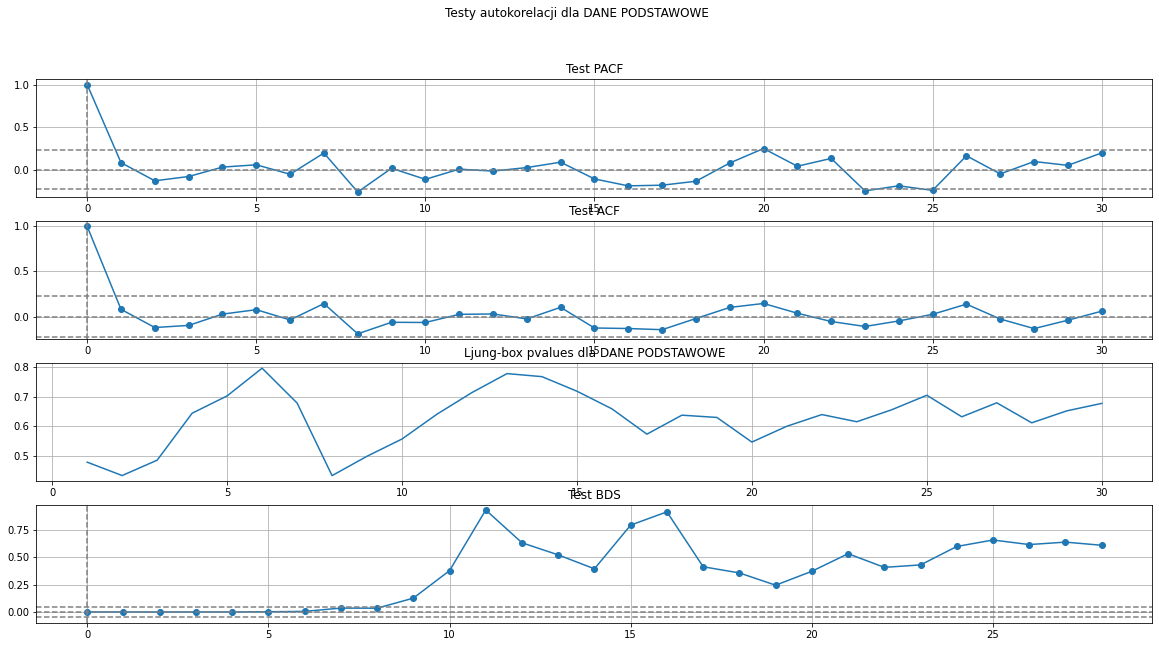

Pvalue testu Jarque-Bera:  0.23480169766604309
Statystyka testu Jarque-Bera:  2.898027921580192


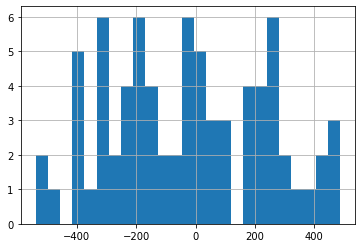

In [4]:
getter.analiza_statystyczna_szeregu(ixic_vec_norm)

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -7.823  |  Wartość krytyczna dla 5%: -2.9

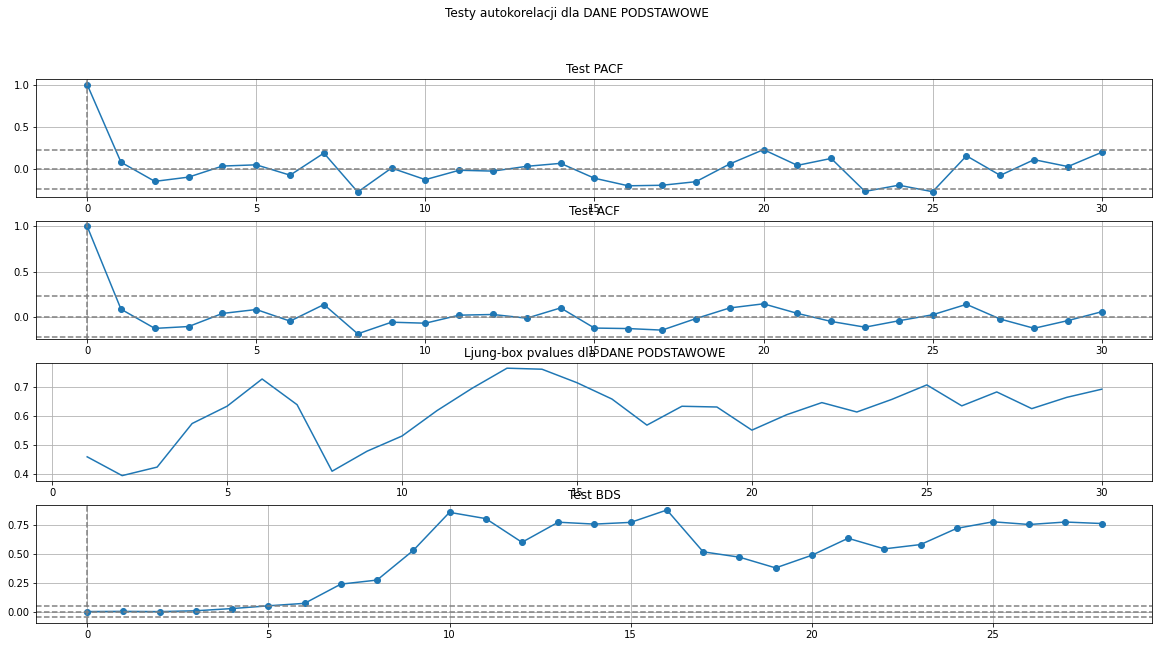

Pvalue testu Jarque-Bera:  0.24105250301152248
Statystyka testu Jarque-Bera:  2.8454810287976033


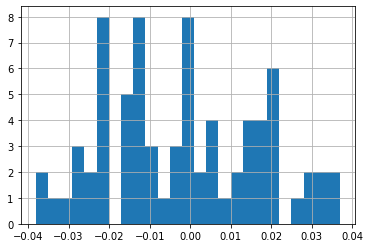

In [5]:
getter.analiza_statystyczna_szeregu(ixic_vec_log)

In [6]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 20,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   44769531            0     15265859    226576703      3883671  ticks
       #2  4200 MHz   44041609            0      6316015    236254468       202875  ticks
       #3  4200 MHz   85810906            0      8802015    191999171       182718  ticks
       #4  4200 MHz   40598437            0      5299234    240714421       135406  ticks
       #5  4200 MHz   54228531            0      8784796    223598625       185859  ticks
       #6  4200 MHz   40009515            0      5898562    240703875       141875  ticks
       #7  4200 MHz   55838281            0      7932281    222841390       172875  ticks
       #8  4200 MHz   42915906            0      6366750    237329296     

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 2, 3
2, 3, 2
2, 3, 3
3, 2, 2
3, 2, 3
3, 3, 2
3, 3, 3
4, 2, 2
4, 2, 3
4, 3, 2
4, 3, 3
5, 2, 2
5, 2, 3
5, 3, 2
5, 3, 3
6, 2, 2
6, 2, 3
6, 3, 2
6, 3, 3
7, 2, 2
7, 2, 3
7, 3, 2
7, 3, 3
8, 2, 2
8, 2, 3
8, 3, 2
8, 3, 3
9, 2, 2
9, 2, 3
9, 3, 2
9, 3, 3
10, 2, 2
10, 2, 3
10, 3, 2
10, 3, 3
11, 2, 2
11, 2, 3
11, 3, 2
11, 3, 3
12, 2, 2
12, 2, 3
12, 3, 2
12, 3, 3
13, 2, 2
13, 2, 3
13, 3, 2
13, 3, 3
14, 2, 2
14, 2, 3
14, 3, 2
14, 3, 3
15, 2, 2
15, 2, 3
15, 3, 2
15, 3, 3
16, 2, 2
16, 2, 3
16, 3, 2
16, 3, 3
17, 2, 2
17, 2, 3
17, 3, 2
17, 3, 3
18, 2, 2
18, 2, 3
18, 3, 2
18, 3, 3
19, 2, 2
19, 2, 3
19, 3, 2
19, 3, 3
20, 2, 2
20, 2, 3
20, 3, 2
20, 3, 3

In [7]:
cart_ar.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

{'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2}
fit


forecast_raw
forecast_raw
forecast_raw
SUMA:  16  /  23


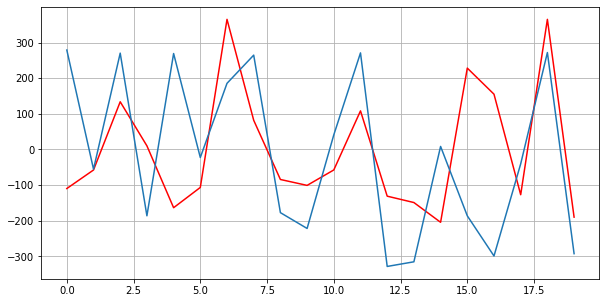

In [8]:
plt.figure(figsize=(10,5))
plt.plot(cart_ar.forecast_raw()[:20], c='r')
plt.plot(cart_ar.data_test[:20].values)

plt.grid()

print("SUMA: ",sum(cart_ar.data_test.values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))

Analiza statystyczna reszt:

Date
2022-03-18    388.759603
2022-03-21      2.276367
2022-03-22    136.537109
2022-03-23   -196.362891
2022-03-24    432.733154
2022-03-25     84.052874
2022-03-28   -179.579590
2022-03-29    182.832682
2022-03-30    -93.082227
2022-03-31   -120.883789
2022-04-01     98.520508
2022-04-04    162.763672
2022-04-05   -197.261914
2022-04-06   -166.349609
2022-04-07    212.929362
2022-04-08   -414.625000
2022-04-11   -454.150391
2022-04-12     86.665527
2022-04-13    -93.160645
2022-04-14   -102.516276
2022-04-18     10.188843
2022-04-19    151.879639
2022-04-20     60.280762
Name: Close, dtype: float64
analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAW

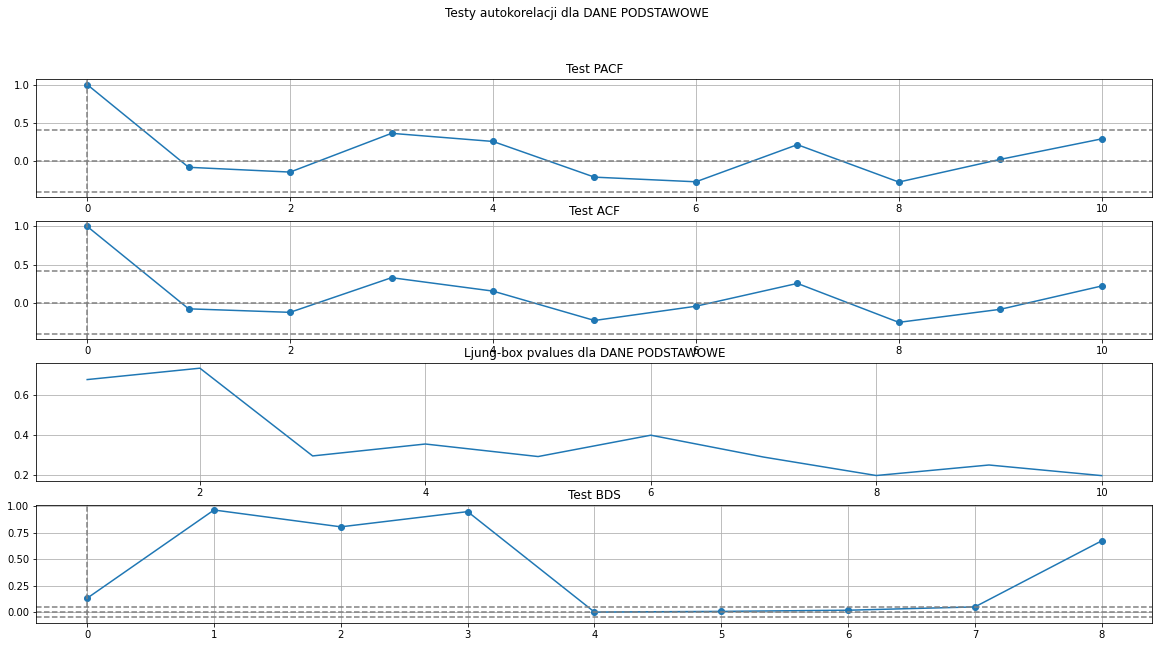

Pvalue testu Jarque-Bera:  0.9598271623671669
Statystyka testu Jarque-Bera:  0.08200409986025074


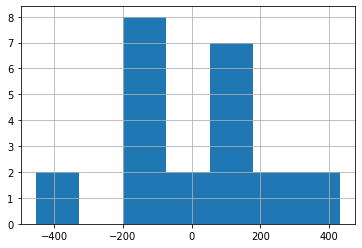

In [10]:
print(cart_ar.errors)
getter.analiza_statystyczna_szeregu(cart_ar.errors, max_lag=10)

Random Forest:

In [11]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = rf_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "max_n_estimators": 10,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   44774500            0     15268953    226639156      3884109  ticks
       #2  4200 MHz   44044250            0      6317828    236320531       202906  ticks
       #3  4200 MHz   85815781            0      8804750    192062078       182750  ticks
       #4  4200 MHz   40602593            0      5301593    240778421       135421  ticks
       #5  4200 MHz   54234703            0      8788343    223659421       185875  ticks
       #6  4200 MHz   40014046            0      5900765    240767656       141875  ticks
       #7  4200 MHz   55849531            0      7936593    222896343       172890  ticks
       #8  4200 MHz   42919906            0      6368593    237393968     

{'max_depth': 4.0, 'min_samples_split': 2, 'max_n_estimators': 3, 'min_samples_leaf': 2}
fit
forecast_raw
forecast_raw
forecast_raw
SUMA:  15  /  23


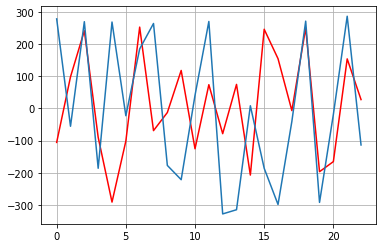

In [12]:
rf_ar.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "max_n_estimators": int(opt["max_n_estimators"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(rf_ar.forecast_raw(), c='r')
plt.plot(rf_ar.data_test.values)
plt.grid()

print("SUMA: ",sum(rf_ar.data_test.values * rf_ar.forecast_raw() > 0), " / ", len(rf_ar.forecast_raw()))

Date
2022-03-18    416.912815
2022-03-21    -82.833529
2022-03-22    515.825477
2022-03-23   -201.587592
2022-03-24    544.578071
2022-03-25    -93.046902
2022-03-28    107.608301
2022-03-29    207.013021
2022-03-30    -68.172707
2022-03-31   -361.682780
2022-04-01    215.340820
2022-04-04    119.481554
2022-04-05   -221.219645
2022-04-06   -392.836046
2022-04-07    102.438086
2022-04-08   -421.887370
2022-04-11   -209.540500
2022-04-12    -19.081787
2022-04-13     39.218153
2022-04-14   -129.433865
2022-04-18     11.797211
2022-04-19    140.027778
2022-04-20    -56.087196
Name: Close, dtype: float64
analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAW

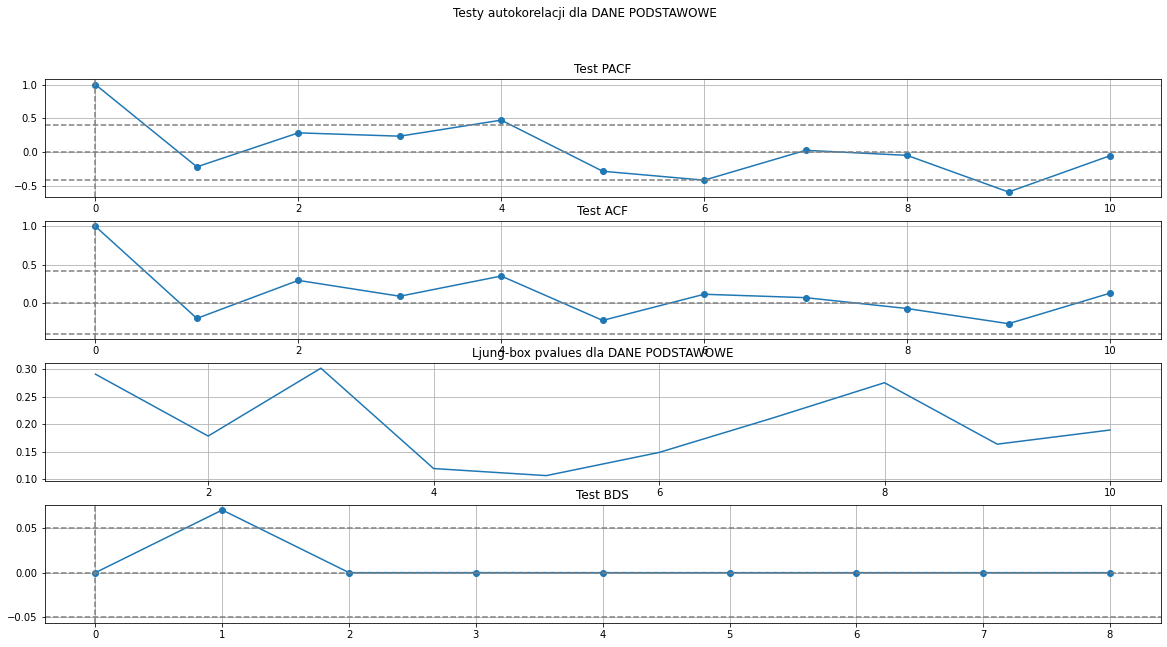

Pvalue testu Jarque-Bera:  0.7174680516768857
Statystyka testu Jarque-Bera:  0.664053719238663


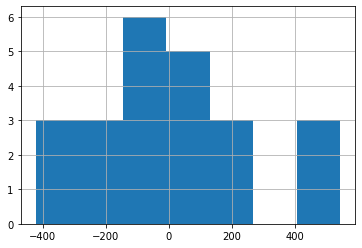

In [14]:
print(rf_ar.errors)
getter.analiza_statystyczna_szeregu(rf_ar.errors, max_lag=10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
cross_validation_rolling_window
{'k_max': '14', 'weights': 'uniform', 'p': '1'}
                     1
Date                  
2022-01-04  187.830078
2022-01-05 -210.080078
2022-01-06 -522.549805
2022-01-07  -19.309570
2022-01-10 -144.959961
2022-01-11    6.929688
2022-01-12  210.620117
2022-01-13   34.939453
2022-01-14 -381.580078
2022-01-18   86.940430
2022-01-19 -386.849609
2022-01-20 -166.640625
2022-01-21 -186.240234
2022-01-24 -385.099609
2022-01-25   86.209961
2022-01-26 -315.839844
2022-01-27    2.830078
2022-01-28 -189.339844
2022-01-31  417.790039
2022-02-01  469.309570
2022-02-02  106.120117
2022-02-03   71.549805
2022-02-04 -538.729492
2022-02-07  219.189453
2022-02-08  -82.339844
2022-02-09  178.780273
2022-02-10  295.919922
2022-02-11 -304.730469
2022-02-14 -394.489258
2022-02-15   -0.230469
2022-02-16  348.839844
2022-02-17  -15.669922
2022-02-18 -407.370117
2022-02-22 -168.649414
2022-02-23 -166.550781
2022-02-24 -344.02929

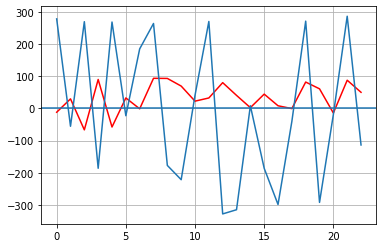

In [16]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/2, params={"k_max":20,
                                                                       "weights":['uniform', 'distance'],
                                                                       "p":[1, 2]
                                                                      })

print(opt)
knn_ar.fit(params_fit={"k": opt["k_max"],
                        "weights": opt["weights"],
                        "p": opt["p"]})

plt.plot(knn_ar.forecast_raw(), c='r')
plt.plot(knn_ar.data_test.values)
plt.axhline(0)
plt.grid()

print("SUMA: ",sum(knn_ar.data_test.values * knn_ar.forecast_raw() > 0), " / ", len(knn_ar.forecast_raw()))

Modele wielowymiarowe w reprezentacji ARX

In [17]:
szereg_norm = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "GC=F"], start="2010-09-20", end='2022-01-20', interval="1d").make_diff()
szereg_log = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "GC=F"], start="2020-09-20", end='2022-01-20', interval="1d").make_log_diff()


szereg_norm.dropna(how='any', inplace=True)
szereg_log.dropna(how='any', inplace=True)

szereg_norm

[*********************100%***********************]  4 of 4 completed
make_diff()
[*********************100%***********************]  4 of 4 completed
make_diff()


,CL=F,GC=F,^GSPC,^IXIC
Date,,,,
2010-09-21,-1.340004,-6.599976,-2.929932,-6.479980
2010-09-22,1.190002,17.799927,-5.500000,-14.800049
2010-09-23,0.470001,4.100098,-9.450073,-7.469971
2010-09-24,1.309998,1.699951,23.840088,54.139893
2010-09-27,0.029999,0.699951,-6.510010,-11.449951
...,...,...,...,...
2022-01-12,1.419998,8.599976,13.280273,34.939453
2022-01-13,-0.519997,-6.000000,-67.320312,-381.580078
2022-01-14,1.699997,-4.699951,3.820312,86.940430


analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -11.891  |  Wartość krytyczna dla 5%: -2.

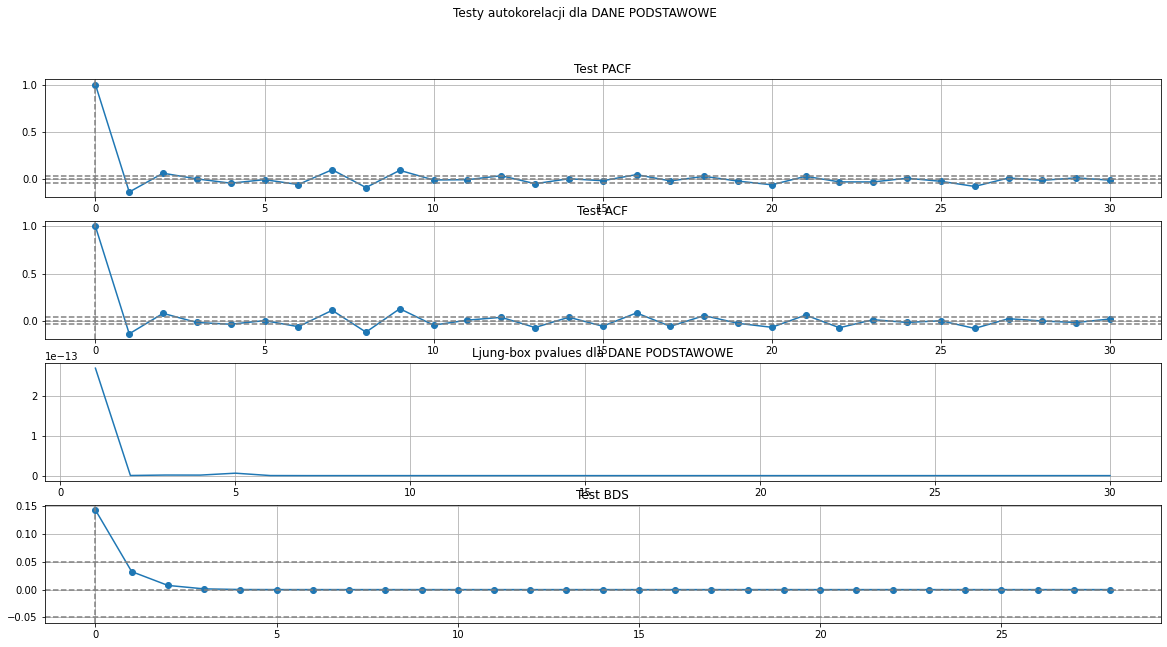

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  25461.928213868683


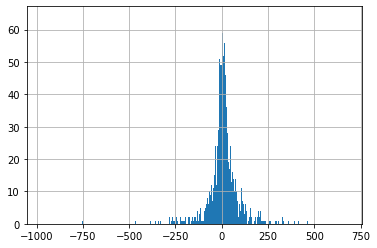

In [18]:
getter.analiza_statystyczna_szeregu(szereg_norm["^IXIC"])

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -19.422  |  Wartość krytyczna dla 5%: -2.

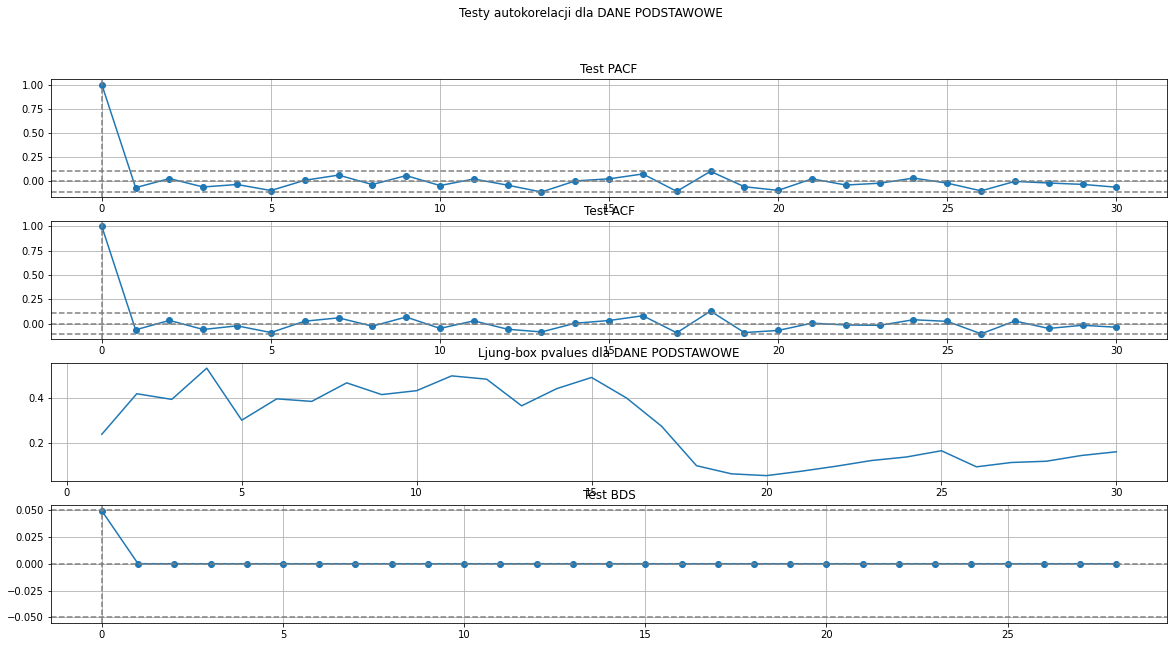

Pvalue testu Jarque-Bera:  7.608665158820305e-05
Statystyka testu Jarque-Bera:  18.96727542936259


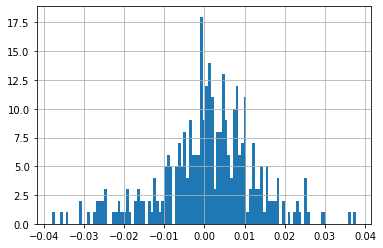

In [19]:
getter.analiza_statystyczna_szeregu(szereg_log["^IXIC"])

Nie ma zauważalnych różnic statystycznych, więc zostajemy przy zwrotach normalnych. Zacznijmy od reprezentacji CART:

In [20]:
cart_arx = CART_ARX(data=szereg_norm, params={"lags": 1}, test_ratio=0.7, to_predict="^IXIC")

opt = cart_arx.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "min_samples_split": 10,
    "min_samples_leaf": 10
})

2, 2, 2
2, 2, 3
2, 2, 4
2, 2, 5
2, 2, 6
2, 2, 7
2, 2, 8
2, 2, 9
2, 2, 10
2, 3, 2
2, 3, 3
2, 3, 4
2, 3, 5
2, 3, 6
2, 3, 7
2, 3, 8
2, 3, 9
2, 3, 10
2, 4, 2
2, 4, 3
2, 4, 4
2, 4, 5
2, 4, 6
2, 4, 7
2, 4, 8
2, 4, 9
2, 4, 10
2, 5, 2
2, 5, 3
2, 5, 4
2, 5, 5
2, 5, 6
2, 5, 7
2, 5, 8
2, 5, 9
2, 5, 10
2, 6, 2
2, 6, 3
2, 6, 4
2, 6, 5
2, 6, 6
2, 6, 7
2, 6, 8
2, 6, 9
2, 6, 10
2, 7, 2
2, 7, 3
2, 7, 4
2, 7, 5
2, 7, 6
2, 7, 7
2, 7, 8
2, 7, 9
2, 7, 10
2, 8, 2
2, 8, 3
2, 8, 4
2, 8, 5
2, 8, 6
2, 8, 7
2, 8, 8
2, 8, 9
2, 8, 10
2, 9, 2
2, 9, 3
2, 9, 4
2, 9, 5
2, 9, 6
2, 9, 7
2, 9, 8
2, 9, 9
2, 9, 10
2, 10, 2
2, 10, 3
2, 10, 4
2, 10, 5
2, 10, 6
2, 10, 7
2, 10, 8
2, 10, 9
2, 10, 10
3, 2, 2
3, 2, 3
3, 2, 4
3, 2, 5
3, 2, 6
3, 2, 7
3, 2, 8
3, 2, 9
3, 2, 10
3, 3, 2
3, 3, 3
3, 3, 4
3, 3, 5
3, 3, 6
3, 3, 7
3, 3, 8
3, 3, 9
3, 3, 10
3, 4, 2
3, 4, 3
3, 4, 4
3, 4, 5
3, 4, 6
3, 4, 7
3, 4, 8
3, 4, 9
3, 4, 10
3, 5, 2
3, 5, 3
3, 5, 4
3, 5, 5
3, 5, 6
3, 5, 7
3, 5, 8
3, 5, 9
3, 5, 10
3, 6, 2
3, 6, 3
3, 6, 4
3, 6, 5
3, 6, 6
3,

{'max_depth': 7.0, 'min_samples_split': 5, 'min_samples_leaf': 2}
fit
forecast_raw
forecast_raw
forecast_raw
SUMA:  484  /  854


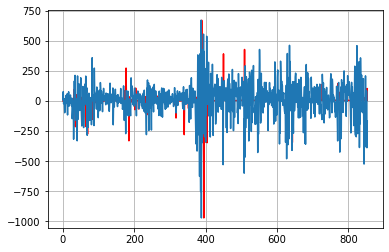

In [21]:
cart_arx.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(cart_arx.forecast_raw(), c='r')
plt.plot(cart_arx.data_test["^IXIC"].values)
plt.grid()

print("SUMA: ",sum(cart_arx.data_test["^IXIC"].values * cart_arx.forecast_raw() > 0), " / ", len(cart_arx.forecast_raw()))

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -8.974  |  Wartość krytyczna dla 5%: -2.8

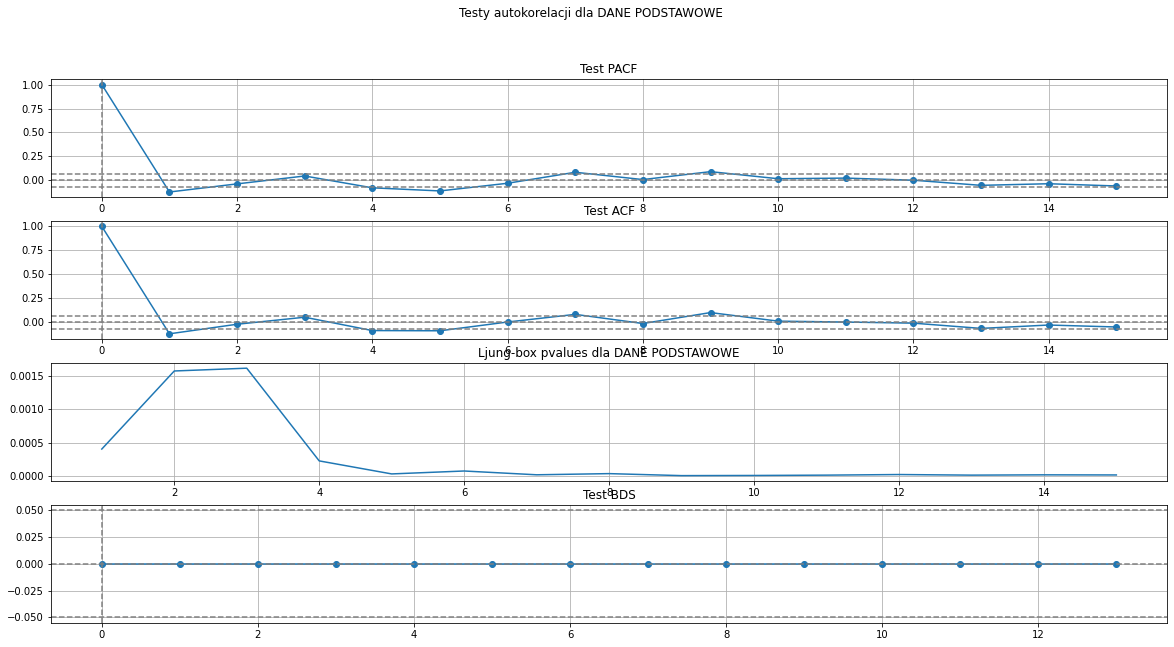

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  4314.934973784022


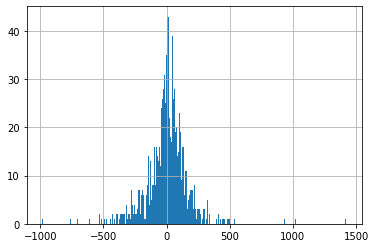

In [22]:
getter.analiza_statystyczna_szeregu(cart_arx.errors, max_lag=15)

In [23]:
rf_arx = RF_ARX(data=szereg_norm, params={"lags": 1}, test_ratio=0.7, to_predict="^IXIC")

opt = rf_arx.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "min_samples_split": 10,
    "max_n_estimators": 3,
    "min_samples_leaf": 3
})


2, 1, 2, 2
2, 1, 2, 3
2, 1, 3, 2
2, 1, 3, 3
2, 1, 4, 2
2, 1, 4, 3
2, 1, 5, 2
2, 1, 5, 3
2, 1, 6, 2
2, 1, 6, 3
2, 1, 7, 2
2, 1, 7, 3
2, 1, 8, 2
2, 1, 8, 3
2, 1, 9, 2
2, 1, 9, 3
2, 1, 10, 2
2, 1, 10, 3
2, 2, 2, 2
2, 2, 2, 3
2, 2, 3, 2
2, 2, 3, 3
2, 2, 4, 2
2, 2, 4, 3
2, 2, 5, 2
2, 2, 5, 3
2, 2, 6, 2
2, 2, 6, 3
2, 2, 7, 2
2, 2, 7, 3
2, 2, 8, 2
2, 2, 8, 3
2, 2, 9, 2
2, 2, 9, 3
2, 2, 10, 2
2, 2, 10, 3
2, 3, 2, 2
2, 3, 2, 3
2, 3, 3, 2
2, 3, 3, 3
2, 3, 4, 2
2, 3, 4, 3
2, 3, 5, 2
2, 3, 5, 3
2, 3, 6, 2
2, 3, 6, 3
2, 3, 7, 2
2, 3, 7, 3
2, 3, 8, 2
2, 3, 8, 3
2, 3, 9, 2
2, 3, 9, 3
2, 3, 10, 2
2, 3, 10, 3
3, 1, 2, 2
3, 1, 2, 3
3, 1, 3, 2
3, 1, 3, 3
3, 1, 4, 2
3, 1, 4, 3
3, 1, 5, 2
3, 1, 5, 3
3, 1, 6, 2
3, 1, 6, 3
3, 1, 7, 2
3, 1, 7, 3
3, 1, 8, 2
3, 1, 8, 3
3, 1, 9, 2
3, 1, 9, 3
3, 1, 10, 2
3, 1, 10, 3
3, 2, 2, 2
3, 2, 2, 3
3, 2, 3, 2
3, 2, 3, 3
3, 2, 4, 2
3, 2, 4, 3
3, 2, 5, 2
3, 2, 5, 3
3, 2, 6, 2
3, 2, 6, 3
3, 2, 7, 2
3, 2, 7, 3
3, 2, 8, 2
3, 2, 8, 3
3, 2, 9, 2
3, 2, 9, 3
3, 2, 10, 2
3, 2, 10, 3

{'max_depth': 9.0, 'min_samples_split': 2, 'max_n_estimators': 3, 'min_samples_leaf': 3}
fit
forecast_raw
forecast_raw
forecast_raw
SUMA:  487  /  854


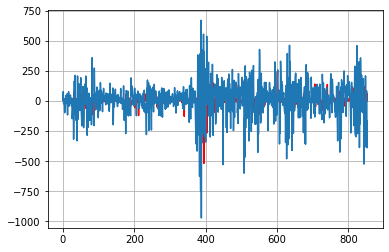

In [24]:
rf_arx.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "max_n_estimators": int(opt["max_n_estimators"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(rf_arx.forecast_raw(), c='r')
plt.plot(rf_arx.data_test["^IXIC"].values)
plt.grid()

print("SUMA: ",sum(rf_arx.data_test["^IXIC"].values * rf_arx.forecast_raw() > 0), " / ", len(rf_arx.forecast_raw()))

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -9.271  |  Wartość krytyczna dla 5%: -2.8

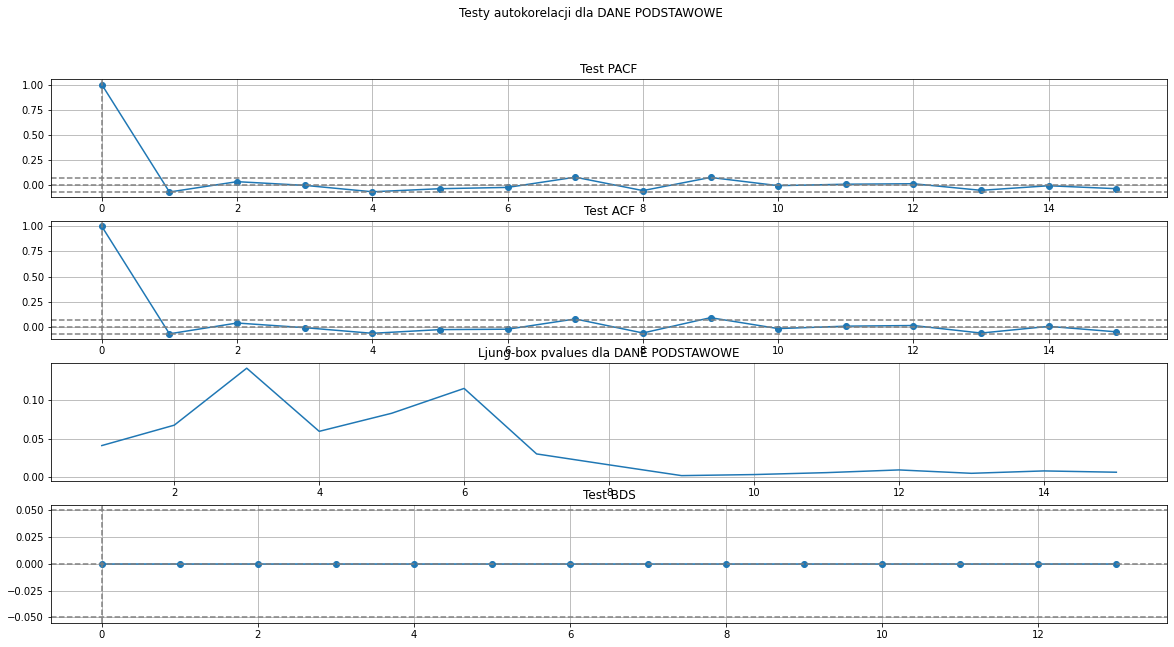

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  860.4162311340051


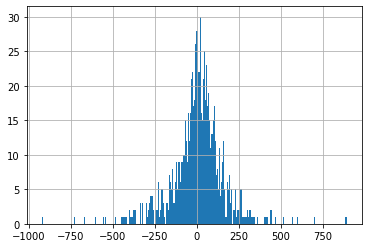

In [25]:
getter.analiza_statystyczna_szeregu(rf_arx.errors, max_lag=15)

Reprezentacja KNN

In [26]:
knn_arx = KNN_ARX(data=szereg_norm, params={"lags": 1,}, test_ratio=0.7, to_predict="^IXIC")

opt = knn_arx.cross_validation_rolling_window(dlugosc_okna=1/2, params = {"k_max": 20,
                                                                         "weights": ["uniform", "distance"],
                                                                         "p": [1, 2]})

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
cross_validation_rolling_window


{'k': '1', 'p': '2', 'weights': 'uniform'}
fit
forecast_raw
forecast_raw
forecast_raw
SUMA:  442  /  854


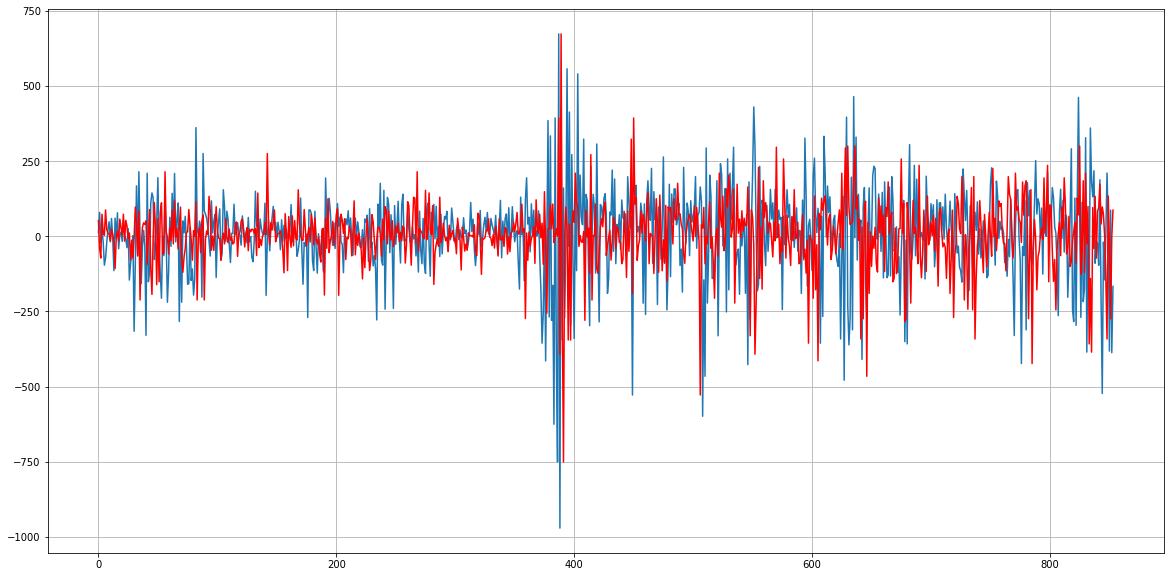

In [27]:
knn_arx.fit(params_fit={
    "k": opt["k_max"],
    "p": opt['p'],
    'weights': opt["weights"]
})

plt.figure(figsize=(20, 10))
plt.plot(knn_arx.data_test["^IXIC"].values)
plt.plot(knn_arx.forecast_raw(), c='r')
plt.grid()

print("SUMA: ",sum(knn_arx.data_test["^IXIC"].values * knn_arx.forecast_raw() > 0), " / ", len(knn_arx.forecast_raw()))

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -28.606  |  Wartość krytyczna dla 5%: -2.

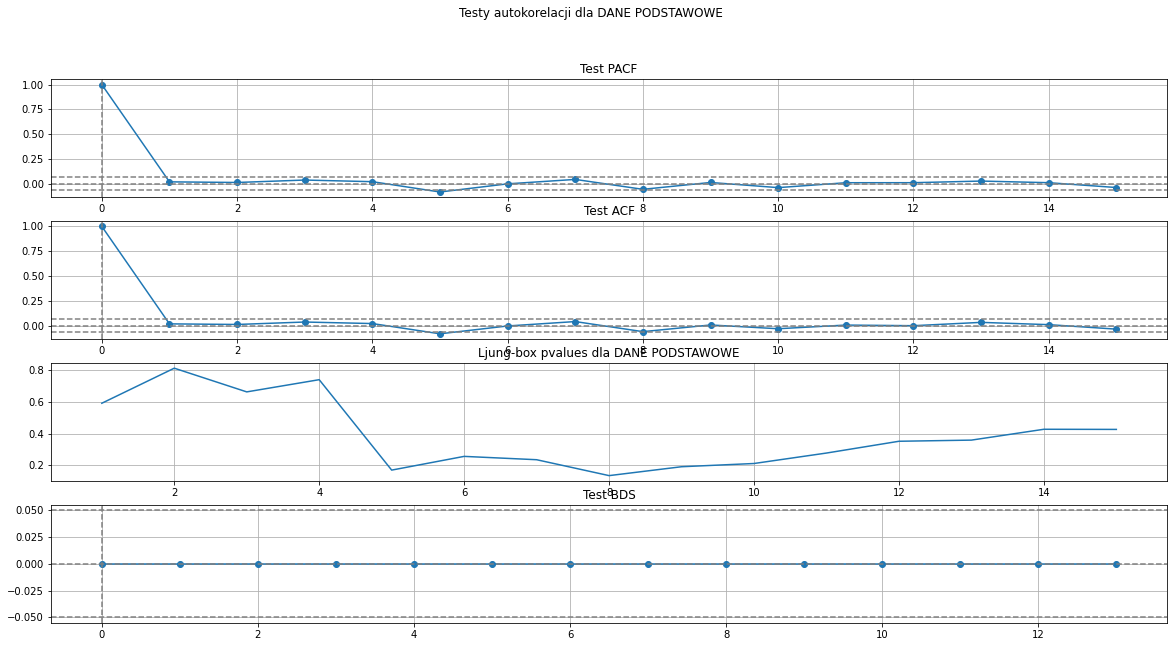

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  177.4381391278015


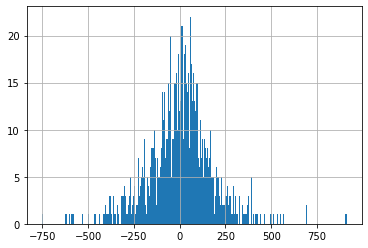

In [28]:
getter.analiza_statystyczna_szeregu(knn_arx.errors, max_lag=15)